<a href="https://colab.research.google.com/github/reaz31/CourseProj/blob/main/Assn3_Reaz_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Binary Classifiers: Predicting Responses to a Bank Direct Marketing Campaign
# Areej Reaz 

 # PART A

In [ ]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import linear_model  # OLS 
from sklearn.metrics import mean_squared_error, r2_score # Basic metrics
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model  # OLS 
from sklearn.metrics import mean_squared_error, r2_score # Basic metrics
from sklearn.model_selection import KFold
from sklearn import preprocessing

In [ ]:

import pickle 
import numpy as np
import pandas as pd
import sklearn 
with open ('/Users/areejreaz/Desktop/MSDS422 - SU2020/Week 3/bankTrain.pickle', 'rb') as pickle_file:
    pickle_data = pickle.load(pickle_file)
bank_df = pd.DataFrame(pickle_data)
bank_df

#The version of the data we’re using has 20 “features” (predictors, or X variables, not including a bank 
#identifier), and one “target” (binary dependent variable), “y.” “y” is the variable you should train your 
#models to predict. y=1 indicates a response to the campaign, and 0 indicates no response.   The bank 
#identifier in our data is "bankID."


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,bankID
22945,29,management,single,high.school,no,no,yes,cellular,jul,tue,...,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no,22945
38430,41,technician,divorced,high.school,no,no,no,cellular,aug,thu,...,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,no,38430
5046,41,admin.,married,university.degree,no,yes,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5046
17050,58,admin.,married,university.degree,no,no,no,cellular,aug,wed,...,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no,17050
29254,29,management,single,university.degree,no,no,no,cellular,nov,wed,...,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no,29254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13659,29,blue-collar,single,basic.9y,no,no,no,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,13659
30164,39,blue-collar,married,basic.9y,no,yes,no,cellular,apr,thu,...,999,0,nonexistent,-1.8,93.075,-47.1,1.483,5099.1,no,30164
647,35,blue-collar,married,basic.9y,unknown,yes,no,telephone,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no,647
8108,31,admin.,married,university.degree,no,yes,no,telephone,aug,tue,...,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no,8108


In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40570 entries, 22945 to 27681
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40570 non-null  int64  
 1   job             40570 non-null  object 
 2   marital         40570 non-null  object 
 3   education       40570 non-null  object 
 4   default         40570 non-null  object 
 5   housing         40570 non-null  object 
 6   loan            40570 non-null  object 
 7   contact         40570 non-null  object 
 8   month           40570 non-null  object 
 9   day_of_week     40570 non-null  object 
 10  duration        40570 non-null  int64  
 11  campaign        40570 non-null  int64  
 12  pdays           40570 non-null  int64  
 13  previous        40570 non-null  int64  
 14  poutcome        40570 non-null  object 
 15  emp.var.rate    40570 non-null  float64
 16  cons.price.idx  40570 non-null  float64
 17  cons.conf.idx   40570 non-n

Text(0.5, 0, 'Responses')

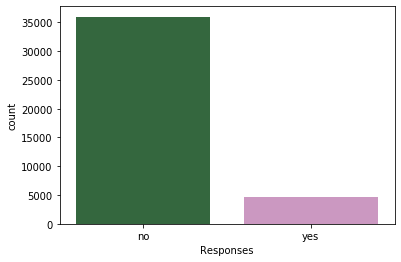

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x= bank_df['y'], data = bank_df, palette = "cubehelix" )
plt.xlabel ('Responses')

plt.show()

In [ ]:
bank_df['y'].value_counts()
#12.7 % of the data is YES 


no     35990
yes     4580
Name: y, dtype: int64

Changing all the numeric Values

In [ ]:
bank_vals = preprocessing.LabelEncoder()
bank_df.housing = bank_vals.fit_transform(bank_df.housing)
bank_df.default = bank_vals.fit_transform(bank_df.default)
bank_df.loan = bank_vals.fit_transform(bank_df.loan)
bank_df.y = bank_vals.fit_transform(bank_df.y)
bank_df.marital = bank_vals.fit_transform(bank_df.marital)
bank_df.poutcome = bank_vals.fit_transform(bank_df.poutcome)
bank_df.y = bank_vals.fit_transform(bank_df.y)

Based on the graph above, seems like there is a very small percentage that responded YES to the campaign, so it would be beneficial to train the data based on the conditions which resulted to a YES.

In [ ]:
        
New_bank_df = bank_df.drop(['job','education','contact','month','day_of_week'], axis=1)
New_bank_df

,age,marital,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,bankID
22945,29,2,0,0,2,103,4,999,0,1,1.4,93.918,-42.7,4.961,5228.1,0,22945
38430,41,0,0,0,0,82,2,999,0,1,1.4,93.444,-36.1,4.962,5228.1,0,38430
5046,41,1,0,2,2,77,2,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,5046
17050,58,1,0,0,0,460,1,999,0,1,1.4,93.444,-36.1,4.965,5228.1,0,17050
29254,29,2,0,0,0,62,1,999,0,1,-0.1,93.200,-42.0,4.120,5195.8,0,29254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13659,29,2,0,0,0,153,1,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0,13659
30164,39,1,0,2,0,253,1,999,0,1,-1.8,93.075,-47.1,1.483,5099.1,0,30164
647,35,1,1,2,0,19,1,999,0,1,1.4,93.918,-42.7,4.968,5228.1,0,647
8108,31,1,0,2,0,223,4,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0,8108


In [ ]:
New_bank_df.groupby('y').mean()

,age,marital,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,bankID
y,,,,,,,,,,,,,,,,
0,39.905613,1.162545,0.223507,1.068269,0.328008,220.925090,2.633926,984.076049,0.132648,0.913226,0.247730,93.603498,-40.597458,3.809966,5176.120028,20592.485163
1,40.935371,1.252183,0.095852,1.103712,0.317249,553.132969,2.048472,792.575546,0.492795,1.061135,-1.232205,93.354617,-39.784127,2.125748,5095.214476,20549.886026


Avg Age for accepting and rejecting the loan is about the same. 
The other categories look fairly simialr except for : 

         Duration -  last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
            
    P-DAYs - number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    
    Previous - number of contacts performed before this campaign and for this client (numeric)
    
    emp.var.rate - employment variation rate - quarterly indicator (numeric)
    
    euribor3m -euribor 3 month rate - daily indicator (numeric)

In [ ]:
print(New_bank_df.describe())


                age       marital       default       housing          loan  \
count  40570.000000  40570.000000  40570.000000  40570.000000  40570.000000   
mean      40.021863      1.172665      0.209095      1.072270      0.326793   
std       10.421979      0.608984      0.406849      0.985238      0.722979   
min       17.000000      0.000000      0.000000      0.000000      0.000000   
25%       32.000000      1.000000      0.000000      0.000000      0.000000   
50%       38.000000      1.000000      0.000000      2.000000      0.000000   
75%       47.000000      2.000000      0.000000      2.000000      0.000000   
max       98.000000      3.000000      2.000000      2.000000      2.000000   

           duration      campaign         pdays      previous      poutcome  \
count  40570.000000  40570.000000  40570.000000  40570.000000  40570.000000   
mean     258.428469      2.567833    962.457308      0.173305      0.929924   
std      259.538128      2.772428    186.956234    

In [ ]:
New_bank_df.keys()

Index(['age', 'marital', 'default', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'bankID'],
      dtype='object')

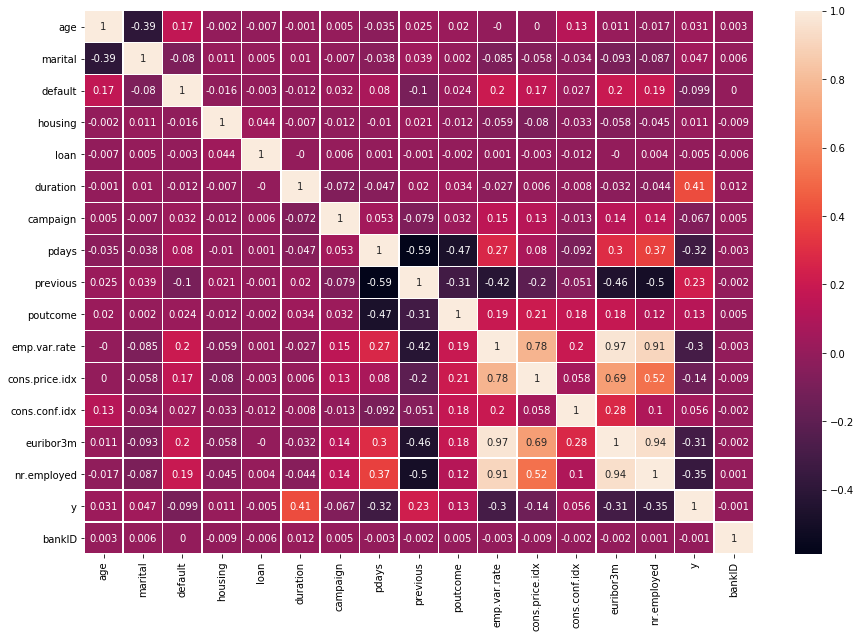

In [ ]:
correlation_matrix = New_bank_df.corr().round(3)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))        

sns.heatmap(data=correlation_matrix, annot=True,linewidths=.5, ax=ax)




There seems to be a positive correlation for the following categories below. This helps with working on the predictions because other features can be eliminated.

social and economic context attributes. 

emp.var.rate: employment variation rate - quarterly indicator (numeric)

cons.price.idx: consumer price index - monthly indicator (numeric) 

cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

euribor3m: euribor 3 month rate - daily indicator (numeric)

nr.employed: number of employees - quarterly indicator (numeric)

In [ ]:
#Various methods and algorithms are used to make predicting rare events more successful.  
#The methods include downsampling, upsampling, and the "Synthetic Minority Oversampling Technique" (SMOTE).


(1) logistic regression as described in Chapter 4 of the Géron (2017) textbook 


In [ ]:
#The training data, train two types of classification models to predict the binary response variable, 
#“y”: Has the client subscribed to a term deposit? Employ just these two classification methods:

#(1) logistic regression as described in Chapter 4 of the Géron (2017) textbook 


X = New_bank_df.iloc[:, 0:17]
y = New_bank_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)


(28399, 17)
(12171, 17)
(28399,)
(12171,)


In [ ]:
logisticRegr = LogisticRegression(max_iter =100)
logisticRegr.fit(X_train, y_train)

#Training Logistic CLF on 70% of the Training set

/Users/areejreaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [ ]:
#Prediction using test data
y_pred = logisticRegr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:

LogRegM=logisticRegr.fit(X_train,y_train)  # instantiate model
yTrainPredLabels=LogRegM.predict(X_train)   # pred training labels
yTestPredLabels=LogRegM.predict(X_test)     # pred test labels
yTrainPredProbs=LogRegM.predict_proba(X_train) # pred training probs
yTestPredProbs=LogRegM.predict_proba(X_test)   # pred test probs

/Users/areejreaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9148796319119218


In [ ]:
print('Training Accuracy: {0:1.2f}'.format(accuracy_score(yTrainPredLabels,y_train)))
print('Test Accuracy: {0:1.2f}'.format(accuracy_score(yTestPredLabels,y_test)))

Training Accuracy: 0.91
Test Accuracy: 0.91


In [ ]:

from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

# Classification report
print(classification_report(y_test,y_pred))

[[10550   257]
 [  779   585]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10807
           1       0.69      0.43      0.53      1364

    accuracy                           0.91     12171
   macro avg       0.81      0.70      0.74     12171
weighted avg       0.90      0.91      0.91     12171




(2) naïve Bayes classification.  Note that there are different implementations of the latter type
of model in scikit-learn.   Be sure to use the kind of model that's appropriate for the data.

Validating with 15 fold cross validation

In [ ]:
from sklearn.naive_bayes import GaussianNB

X = New_bank_df.iloc[:, 0:17]
y = New_bank_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(28399, 17)
(12171, 17)
(28399,)
(12171,)


In [ ]:
models = []

models.append(('Gaussian', GaussianNB()))


In [ ]:


results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42,  shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {}".format(name, cv_results.mean())
    print(msg)

Gaussian: 0.946406813547718


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))



0.8355928025634706


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

# Classification report
print(classification_report(y_test,y_pred))

[[10085   757]
 [ 1244    85]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     10842
           1       0.10      0.06      0.08      1329

    accuracy                           0.84     12171
   macro avg       0.50      0.50      0.49     12171
weighted avg       0.80      0.84      0.82     12171



# Part B. Use your best (most accurate, most generalizable) model to predict “y,” and the probability of y=1, using the test data.

In [ ]:
#DATA FRAME FOR TEST DATA

import sklearn 
with open ('/Users/areejreaz/Desktop/MSDS422 - SU2020/bankTest.pickle', 'rb') as pickle_file:
    pickle_data = pickle.load(pickle_file)
bankTest_df = pd.DataFrame(pickle_data)
bankTest_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,bankID
13,57,management,married,university.degree,no,yes,no,telephone,may,thu,...,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,NaN,13
150,54,blue-collar,married,professional.course,unknown,yes,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,NaN,150
228,39,blue-collar,married,basic.6y,no,yes,no,cellular,nov,thu,...,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,NaN,228
243,30,blue-collar,single,basic.4y,unknown,yes,no,telephone,jun,tue,...,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,NaN,243
280,25,admin.,married,university.degree,no,yes,no,telephone,nov,mon,...,999,0,nonexistent,-3.4,92.649,-30.1,0.714,5017.5,NaN,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40996,53,services,married,high.school,no,no,no,cellular,aug,thu,...,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,NaN,40996
40998,44,services,married,high.school,no,yes,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,NaN,40998
41112,50,admin.,married,university.degree,no,no,no,cellular,aug,mon,...,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,NaN,41112
41118,33,admin.,married,high.school,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,NaN,41118


In [ ]:
bank_vals = preprocessing.LabelEncoder()
bankTest_df.housing = bank_vals.fit_transform(bankTest_df.housing)
bankTest_df.default = bank_vals.fit_transform(bankTest_df.default)
bankTest_df.loan = bank_vals.fit_transform(bankTest_df.loan)
bankTest_df.y = bank_vals.fit_transform(bankTest_df.y)
bankTest_df.marital = bank_vals.fit_transform(bankTest_df.marital)
bankTest_df.poutcome = bank_vals.fit_transform(bankTest_df.poutcome)

NewBankTest_df = bankTest_df.drop(['job','education','contact','month','day_of_week'], axis=1)

NewBankTest_df

,age,marital,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,bankID
13,57,1,0,2,0,278,4,999,0,1,1.1,93.994,-36.4,4.860,5191.0,0,13
150,54,1,1,2,2,198,3,999,0,1,1.1,93.994,-36.4,4.857,5191.0,406,150
228,39,1,0,2,0,332,3,999,0,1,-0.1,93.200,-42.0,4.076,5195.8,407,228
243,30,2,1,2,0,256,1,999,0,1,1.4,94.465,-41.8,4.864,5228.1,408,243
280,25,1,0,2,0,446,8,999,0,1,-3.4,92.649,-30.1,0.714,5017.5,409,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40996,53,1,0,0,0,62,2,999,0,1,1.4,93.444,-36.1,4.963,5228.1,205,40996
40998,44,1,0,2,2,391,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,206,40998
41112,50,1,0,0,0,70,3,999,0,1,1.4,93.444,-36.1,4.963,5228.1,207,41112
41118,33,1,0,2,0,148,1,999,0,1,-1.8,92.893,-46.2,1.250,5099.1,462,41118


Most accurate, most generalizable test would be Logistic Regression

In [ ]:

X = NewBankTest_df.iloc[:, 0:17]
y = NewBankTest_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(432, 17)
(186, 17)
(432,)
(186,)


In [ ]:
logisticRegr = LogisticRegression(max_iter =100)
logisticRegr.fit(X_train, y_train)

/Users/areejreaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [ ]:

LogRegM=logisticRegr.fit(X_train,y_train)  # instantiate model
yTrainPredLabels=LogRegM.predict(X_train)   # pred training labels
yTestPredLabels=LogRegM.predict(X_test)     # pred test labels
yTrainPredProbs=LogRegM.predict_proba(X_train) # pred training probs
yTestPredProbs=LogRegM.predict_proba(X_test)   # pred test probs



/Users/areejreaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#Prediction using test data
y_pred = logisticRegr.predict(X_test)
y_pred

array([251,  52, 586,  15, 136, 245, 135, 150,  43, 318, 427, 142, 180,
       471,  72, 269, 189, 357, 491, 491,  98, 604, 269, 174, 303, 498,
       258,  69, 249, 109,  54, 548, 169, 402, 141, 145, 614, 442, 329,
       616, 106, 441, 207, 471, 491, 436, 207, 328, 402,  27, 579,  26,
       491, 517, 408, 484, 441, 294, 572,  78, 181,   8, 122,  46, 124,
       418, 274, 586, 396, 165, 219, 284,  58, 501, 110,  41, 207, 552,
       445, 574, 121,  55, 453,  73, 438,  41, 479, 182, 494, 219, 100,
       373, 418,  25, 260, 219, 427, 357, 445, 504, 331, 514, 438, 596,
       251, 310, 557, 157,  30, 491, 207,  43, 391,  17, 441, 416, 225,
       176, 500, 331, 418,  72, 563, 378, 206, 479, 207, 142, 259,  30,
       344, 284, 271, 326, 294,   4, 221, 491, 233, 131, 491, 558, 270,
       363, 182, 274,  43, 491, 225, 213, 555, 313, 109, 281,  44, 344,
       530, 101, 108, 427, 468, 233, 491,  32, 318, 471,   8, 407, 593,
       331, 592, 313,   3, 322, 574, 189, 232, 526,  14, 504, 60